In [1]:
import numpy as np
import pandas as pd
import colorsys

In [2]:
color_values = pd.read_csv("skintones.csv")
color_values.rename(columns={'Image Name': 'Image', 'Company Name': 'Company', 'Year': 'Year', 'Blue': 'b', 'Green': 'g', 'Red': 'r'}, inplace=True)
color_values.head()

,Image,Company,Year,b,g,r
0,vogue00000025_2018.jpg,vogue,2018,192.223005,201.932114,233.721320
1,vogue00000056_2013.jpg,vogue,2013,80.794524,112.135175,188.449186
2,vogue00000265_2016.jpg,vogue,2016,162.219308,181.591538,226.261342
3,vogue00000116_2013.jpg,vogue,2013,156.140646,187.711738,232.597027
4,vogue00000032_2022.jpg,vogue,2022,107.843093,131.509835,175.085010


In [3]:
# display int types 
display(color_values.dtypes)

# change floats to int
color_values['b'] = color_values['b'].astype(int)
color_values['g'] = color_values['g'].astype(int)
color_values['r'] = color_values['r'].astype(int)

display(color_values.dtypes)
color_values.head()

Image       object
Company     object
Year         int64
b          float64
g          float64
r          float64
dtype: object

Image      object
Company    object
Year        int64
b           int64
g           int64
r           int64
dtype: object

,Image,Company,Year,b,g,r
0,vogue00000025_2018.jpg,vogue,2018,192,201,233
1,vogue00000056_2013.jpg,vogue,2013,80,112,188
2,vogue00000265_2016.jpg,vogue,2016,162,181,226
3,vogue00000116_2013.jpg,vogue,2013,156,187,232
4,vogue00000032_2022.jpg,vogue,2022,107,131,175


# Use H, S, L values to determine skin tone

In [4]:
h_col = []
l_col = []
s_col = []

for index, row in color_values.iterrows():
    r = row["r"] / 255
    g = row["g"] / 255
    b = row["b"] / 255
    (h, l, s) = colorsys.rgb_to_hls(r, g, b)
    h_col.append(h)
    l_col.append(l)
    s_col.append(s)
    
color_values["h"] = h_col
color_values["l"] = l_col
color_values["s"] = s_col

color_values = color_values.sort_values(by=["l"])
color_values.head()

,Image,Company,Year,b,g,r,h,l,s
248,vogue00000142_2021.jpg,vogue,2021,29,34,53,0.034722,0.160784,0.292683
261,vogue00000249_2015.jpg,vogue,2015,31,35,57,0.025641,0.172549,0.295455
139,vogue00000174_2020.jpg,vogue,2020,38,34,71,0.981982,0.205882,0.352381
273,vogue00000101_2019.jpg,vogue,2019,35,49,73,0.061404,0.211765,0.351852
286,vogue00000014_2021.jpg,vogue,2021,32,52,77,0.074074,0.213725,0.412844


In [5]:
color_values.tail(5) 

,Image,Company,Year,b,g,r,h,l,s
271,vogue00000146_2012.jpg,vogue,2012,187,201,226,0.059829,0.809804,0.402062
9,vogue00000087_2007.jpg,vogue,2007,184,205,233,0.071429,0.817647,0.526882
220,vogue00000165_2004.jpg,vogue,2004,185,204,233,0.065972,0.819608,0.521739
0,vogue00000025_2018.jpg,vogue,2018,192,201,233,0.036585,0.833333,0.482353
251,vogue00000197_2000.jpg,vogue,2000,206,210,227,0.031746,0.849020,0.272727


In [6]:
color_values.groupby('l')
color_values.head()

,Image,Company,Year,b,g,r,h,l,s
248,vogue00000142_2021.jpg,vogue,2021,29,34,53,0.034722,0.160784,0.292683
261,vogue00000249_2015.jpg,vogue,2015,31,35,57,0.025641,0.172549,0.295455
139,vogue00000174_2020.jpg,vogue,2020,38,34,71,0.981982,0.205882,0.352381
273,vogue00000101_2019.jpg,vogue,2019,35,49,73,0.061404,0.211765,0.351852
286,vogue00000014_2021.jpg,vogue,2021,32,52,77,0.074074,0.213725,0.412844


In [7]:
# Define custom bins for lightness values
bins = np.arange(0.2, 1.0, 0.05)

color_values.groupby(pd.cut(color_values['l'], bins=bins))
color_values.head()

,Image,Company,Year,b,g,r,h,l,s
248,vogue00000142_2021.jpg,vogue,2021,29,34,53,0.034722,0.160784,0.292683
261,vogue00000249_2015.jpg,vogue,2015,31,35,57,0.025641,0.172549,0.295455
139,vogue00000174_2020.jpg,vogue,2020,38,34,71,0.981982,0.205882,0.352381
273,vogue00000101_2019.jpg,vogue,2019,35,49,73,0.061404,0.211765,0.351852
286,vogue00000014_2021.jpg,vogue,2021,32,52,77,0.074074,0.213725,0.412844


# Visualisations

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

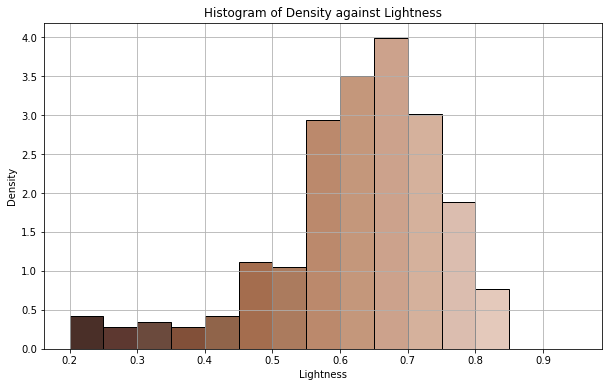

In [9]:
# Define custom bins for lightness values
bins = np.arange(0.2, 1.0, 0.05)

# Group by lightness and calculate average BGR values
average_bgr = color_values.groupby(pd.cut(color_values['l'], bins=bins))[['b', 'g', 'r']].mean()

# Calculate the density of data points in each bin
lightness_counts, _ = np.histogram(color_values['l'], bins=bins)
bin_widths = bins[1:] - bins[:-1]
density = lightness_counts / np.sum(lightness_counts * bin_widths)

# Plot histogram for density against lightness
plt.figure(figsize=(10, 6))
for i, (index, row) in enumerate(average_bgr.iterrows()):
    rgb_color = row.values[::-1] / 255.0  # Reverse BGR to RGB and normalize to [0, 1]
    rgb_color = np.nan_to_num(rgb_color) 
    hex_color = rgb2hex(rgb_color)  # Convert RGB to hex color
    plt.bar(index.mid, density[i], width=index.length, color=hex_color, edgecolor='black')

plt.xlabel('Lightness')
plt.ylabel('Density')
plt.title('Histogram of Density against Lightness')
plt.grid(True)
plt.show()

/var/folders/tl/pjvv24r97gb_70lb57b6jp680000gn/T/ipykernel_23432/1924195903.py:8: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow([[color[::-1] for color in colors]], aspect='auto')  # Reverse back to BGR for plotting


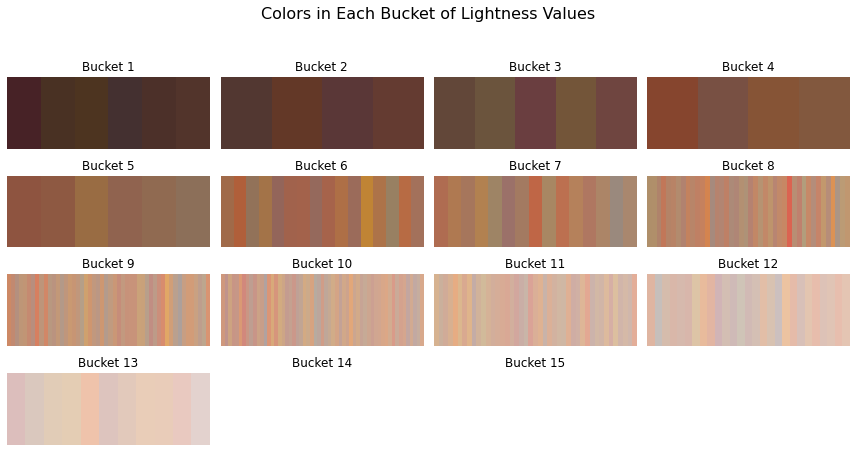

In [12]:
# Group by lightness and get the colors in each bucket
colors_by_bucket = color_values.groupby(pd.cut(color_values['l'], bins=bins))[['b', 'g', 'r']].apply(lambda x: x.values.tolist())

plt.figure(figsize=(12, 8))
for i, (index, colors) in enumerate(colors_by_bucket.iteritems(), start=1):
    plt.subplot(5, 4, i)
    hex_colors = [rgb2hex([color / 255.0 for color in color[::-1]]) for color in colors]  # Reverse BGR to RGB and convert to hex
    plt.imshow([[color[::-1] for color in colors]], aspect='auto')  # Reverse back to BGR for plotting
    plt.axis('off')
    plt.title(f'Bucket {i}')

plt.suptitle('Colors in Each Bucket of Lightness Values', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Skin Tones throughout the years

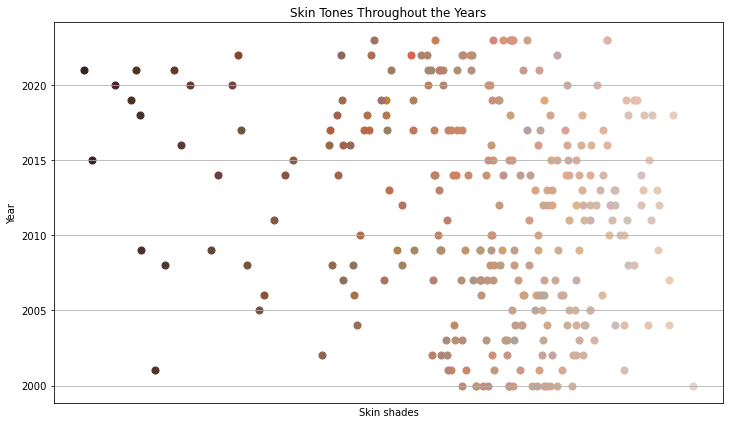

In [10]:
plt.figure(figsize=(12, 7))
for index, row in color_values.iterrows():
    avg_skin_tone = (row['r'] + row['g'] + row['b']) / 3  # Calculate average skin tone
    plt.scatter(avg_skin_tone, row['Year'], color=(row['r']/255, row['g']/255, row['b']/255), label='Skin Color', s=50)

# Customize plot
plt.xlabel('Skin shades')
plt.ylabel('Year')
plt.title('Skin Tones Throughout the Years')
plt.grid(True)
plt.xticks([]) #remove x axis labels
plt.show()

### Observations
From the graph, we can observe that the distribution of skin tones widens and becomes more uniformly distributed over time. This implies a growing diversity and inclusion of women, particularly in the representation of women of color.

Between 2000 and 2005, there isn’t a lot of variance in how light the cover models appear. Only three of the eighty-one cover models were black, and all of these women had lighter skin (Marion Jones, Halle Berry, and Liya Kebede.

There is a bit more spread after 2005. Certainly, part of this is due to the race of the models that appeared on the Vogue covers but part can also be attributed to the changes in photography styles, lighting and beauty trends.

#### Photography Styles and lighting

Lighting, staging, and post-photographic processing play a role in creating the skin tone that we actually see on the magazine’s cover. Ultimately, the same woman can end up looking quite different depending on who’s shooting and editing her.

The best example of this is Rihanna. Across her five Vogue covers, her skin tone lightness spanned 40% of the lightness range that we found among cover models.
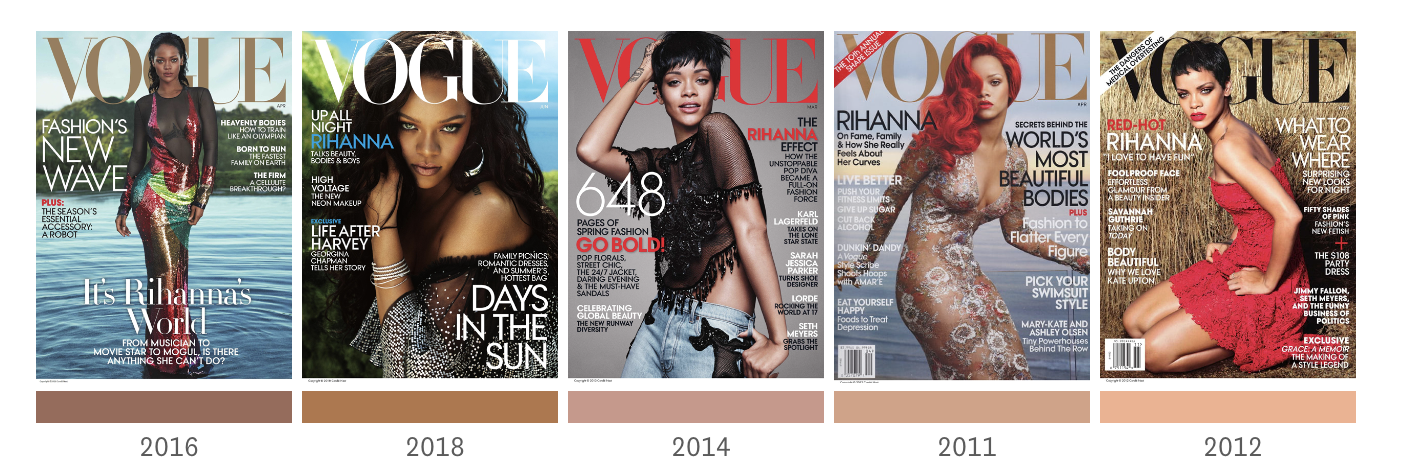


#### Beauty Trends and Cultural Appropriation

With the success of the late 2000s reality show, Keeping up with the Kardashians, the Kardashians have made their way into mainstream culture and significantly influenced beauty standards. An article from allure.com states "During the Kardashian reign, a new term was coined to describe the suddenly rampant phenomenon of racial performance on social media: blackfishing. Stemming from the racist practice of blackface, blackfishing specifically describes when people use tools like makeup, Photoshop, and cosmetic surgery that make them appear more Black."

## References

https://stackoverflow.com/questions/12182891/plot-image-color-histogram-using-matplotlib?rq=3

https://pudding.cool/2019/04/vogue/

https://www.youtube.com/watch?v=44C_oJiseTQ

https://archive.vogue.com/

https://www.allure.com/story/the-kardashian-effect